<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/12_FilterTypesAndStructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Filter Types and Structures</h1>**

# 1. More Filter types


## 1.1 Comb filters
Comb filters are signal processing filters used to either add or remove certain frequencies from a signal. The name "comb" comes from the shape of their frequency response, which has a series of regularly spaced peaks and notches that resemble the teeth of a comb. These filters can be implemented in digital or analog form and are particularly useful in various applications like audio processing, telecommunications, and radar systems.

in Math Model

$
y[n] = \sum_{k=0}^{K} \alpha_k \cdot x[n - kL] + \sum_{k=1}^{J} \beta_k \cdot y[n - kL]
$

if 'parent' filter impulse response h[n] becomes comb filter output as:

$
g[n] = \{h[0], \underbrace{0, 0, \ldots, 0}_{L-1 \text{ zeros}}, h[1], \underbrace{0, 0, \ldots, 0}_{L-1 \text{ zeros}}, h[2], \ldots\}
$

then,

$
G(z) = \sum_{n} g[n]z^{-n} = \sum_{n} h[n]z^{-nL} = H(z^L)
$

Hence Frequency response :



Text(0.5, 0, '$ \\cdot \\pi$')

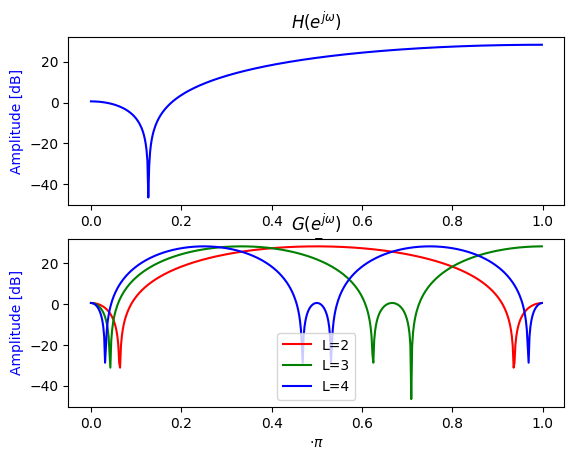

In [23]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse response h[n]
h_1 = [6.761, -12.456, 6.761]

w, h_ejw = signal.freqz(h_1)
w_label = w/np.pi

h_comb = [6.761,0, -12.456,0, 6.761]
h_comb_2 = [6.761,0,0, -12.456,0,0, 6.761]
h_comb_3 = [6.761,0,0,0, -12.456,0,0,0, 6.761]
# h_comb_4 = [6.761,0,0,0,0, -12.456,0,0,0,0, 6.761]

w, g_ejw  = signal.freqz(h_comb)
w, g_ejw_2  = signal.freqz(h_comb_2)
w, g_ejw_3  = signal.freqz(h_comb_3)

fig, axs = plt.subplots(2,1)
axs[0].set_title('$H(e^{j\omega})$')
axs[0].plot(w_label, 20 * np.log10(abs(h_ejw)), 'b')
axs[0].set_ylabel('Amplitude [dB]', color='b')
axs[0].set_xlabel('$ \cdot \pi$')

axs[1].set_title('$G(e^{j\omega})$')
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw)), 'r',label="L=2")
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw_2)), 'g',label="L=3")
axs[1].plot(w_label, 20 * np.log10(abs(g_ejw_3)), 'b',label="L=4")
axs[1].legend()
axs[1].set_ylabel('Amplitude [dB]', color='b')
axs[1].set_xlabel('$ \cdot \pi$')


# ax2 = ax1.twinx()
# angles = np.unwrap(np.angle(h))
# ax2.plot(w_label, angles, 'g')
# ax2.set_ylabel('Angle (radians)', color='g')
# ax2.grid(True)
# ax2.axis('tight')
# plt.show()


### Applications of Comb Filters
Audio Processing: Comb filters are used in audio equalization, reverberation, and for creating special effects like flanging and phasing.
Telecommunications: They help in multipath interference reduction, where signals that have taken different paths interfere destructively.
Radar Systems: Comb filters can help in isolating specific frequencies returned by the radar echo, aiding in signal clarity and object detection.
Image Processing: In video and image applications, comb filters are used to separate chrominance (color) and luminance (brightness) signals, enhancing picture quality.


imagine it have pole
## 1.2 All Pass filters

# 1. More Filter types
## Comb filters

imagine it have pole
## All Pass filters

give example if we cascade series filter with allpass filter to correction the phase

Final Exam : Minimum Phase Cascade with Allpass Filter


##
Breakdown H_f to H_minphase and H_allpass


only need change the floating point ??

Practice about TF to Cascade/SOS .

design filter in period filter(IZT ?).